# Exploratory Data Analysis of Spotify Tracks Dataset

By Samman Das | Team Hephaestus | **The Manhattan Project**

## Project Overview
This notebook performs an Exploratory Data Analysis on the Spotify Tracks dataset. The goal is to understand patterns in the data and see what makes songs popular.

**Dataset**: Spotify Tracks with audio features  
**Objective**: Analyze music characteristics and popularity  

---

## 1. Import Required Libraries and Configuration

In [19]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


## 2. Data Loading and Initial Inspection

Let's load the Spotify tracks dataset and perform an initial exploration to understand the structure and characteristics of our data.

In [20]:
# Load the dataset
df_spotify = pd.read_csv('Datasets/spotify_tracks.csv')

print(f"Dataset shape: {df_spotify.shape}")
print(f"Total tracks: {df_spotify.shape[0]:,}")
print(f"Total features: {df_spotify.shape[1]}")
print()


Dataset shape: (62317, 22)
Total tracks: 62,317
Total features: 22



In [21]:
# Display first few rows
print("="*100)
print("FIRST LOOK AT THE DATA")
print("="*100)
print("First 5 rows of the dataset:")
display(df_spotify.head())

FIRST LOOK AT THE DATA
First 5 rows of the dataset:


,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


In [22]:
# Dataset information
print("\nDataset Information:")
print(df_spotify.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       

In [23]:
# Basic statistical summary
print("\nStatistical Summary of Numerical Features:")
display(df_spotify.describe())


Statistical Summary of Numerical Features:


,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,62317.000000,62317.000000,62317.000000,62317.000000,6.231700e+04,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000
mean,2014.425935,15.358361,0.362292,0.596807,2.425270e+05,0.602496,0.146215,5.101658,0.194143,-65.103433,0.586052,0.087722,117.931247,3.857086,0.495226
std,9.645113,18.626908,0.314609,0.186209,1.129999e+05,0.246144,0.307804,3.553469,0.172030,2369.051478,0.493682,0.115150,28.509459,0.502660,0.264787
min,1971.000000,0.000000,-1.000000,-1.000000,5.000000e+03,-1.000000,-1.000000,-1.000000,-1.000000,-100000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2011.000000,0.000000,0.067100,0.497000,1.921600e+05,0.440000,0.000000,2.000000,0.093200,-10.727000,0.000000,0.036700,95.942000,4.000000,0.292000
50%,2017.000000,7.000000,0.286000,0.631000,2.362670e+05,0.639000,0.000025,5.000000,0.125000,-7.506000,1.000000,0.048900,117.991000,4.000000,0.507000
75%,2022.000000,26.000000,0.632000,0.730000,2.862400e+05,0.803000,0.015200,8.000000,0.243000,-5.456000,1.000000,0.089100,135.081000,4.000000,0.710000
max,2024.000000,93.000000,0.996000,0.986000,4.581483e+06,1.000000,0.999000,11.000000,0.998000,1.233000,1.000000,0.959000,239.970000,5.000000,0.995000


In [24]:
# Examine categorical features
print("\nCategorical Features Analysis:")

categorical_features = ['language', 'mode', 'time_signature']

for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    value_counts = df_spotify[feature].value_counts()
    print(f"  - Unique values: {df_spotify[feature].nunique()}")
    print(f"  - Most common: {value_counts.index[0]} ({value_counts.iloc[0]:,} tracks)")
    if len(value_counts) > 1:
        print(f"  - Second most: {value_counts.index[1]} ({value_counts.iloc[1]:,} tracks)")

print(f"\nYEAR RANGE:")
print(f"  - From: {df_spotify['year'].min()}")
print(f"  - To: {df_spotify['year'].max()}")
print(f"  - Span: {df_spotify['year'].max() - df_spotify['year'].min()} years")


Categorical Features Analysis:

LANGUAGE:
  - Unique values: 7
  - Most common: English (23,392 tracks)
  - Second most: Unknown (13,005 tracks)

MODE:
  - Unique values: 3
  - Most common: 1.0 (36,556 tracks)
  - Second most: 0.0 (25,726 tracks)

TIME_SIGNATURE:
  - Unique values: 6
  - Most common: 4.0 (53,332 tracks)
  - Second most: 3.0 (7,071 tracks)

YEAR RANGE:
  - From: 1971
  - To: 2024
  - Span: 53 years


## 3. Data Cleaning and Preprocessing

Based on our initial inspection, let's identify and handle any data quality issues.

In [25]:
# Check for duplicates
print("Checking for duplicate tracks...")
duplicates = df_spotify.duplicated(subset=['track_id']).sum()
print(f"Duplicate track IDs: {duplicates}")

# Check for unusual values in numerical features
print("\nChecking for unusual values...")

# Check for -1 values (indicating missing/unknown data in Spotify API)
features_to_check = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                     'liveness', 'speechiness', 'valence', 'tempo', 'key', 'mode', 'time_signature']

print("Features with -1 values (indicating missing/unknown data):")
for feature in features_to_check:
    count_neg_one = (df_spotify[feature] == -1).sum()
    if count_neg_one > 0:
        percentage = (count_neg_one / len(df_spotify)) * 100
        print(f"  - {feature}: {count_neg_one} tracks ({percentage:.2f}%)")

# Check loudness outliers
loudness_outliers = (df_spotify['loudness'] < -50).sum()
print(f"\nLoudness values below -50 dB: {loudness_outliers} ({(loudness_outliers/len(df_spotify)*100):.2f}%)")

# Check duration outliers
duration_outliers_low = (df_spotify['duration_ms'] < 30000).sum()  # This is for Less than 30 seconds
duration_outliers_high = (df_spotify['duration_ms'] > 600000).sum()  # This is for More than 10 minutes
print(f"Duration < 30 seconds: {duration_outliers_low} tracks")
print(f"Duration > 10 minutes: {duration_outliers_high} tracks")

Checking for duplicate tracks...
Duplicate track IDs: 78

Checking for unusual values...
Features with -1 values (indicating missing/unknown data):
  - acousticness: 35 tracks (0.06%)
  - danceability: 35 tracks (0.06%)
  - energy: 35 tracks (0.06%)
  - instrumentalness: 35 tracks (0.06%)
  - liveness: 35 tracks (0.06%)
  - speechiness: 35 tracks (0.06%)
  - valence: 35 tracks (0.06%)
  - tempo: 35 tracks (0.06%)
  - key: 35 tracks (0.06%)
  - mode: 35 tracks (0.06%)
  - time_signature: 35 tracks (0.06%)

Loudness values below -50 dB: 36 (0.06%)
Duration < 30 seconds: 201 tracks
Duration > 10 minutes: 370 tracks


In [26]:
# Create a cleaned dataset
print("Cleaning the dataset...")

# Create a copy for cleaning
df_clean = df_spotify.copy()

# Remove duplicate track IDs (keep first occurrence)
df_clean = df_clean.drop_duplicates(subset=['track_id'], keep='first')
print(f"Removed {duplicates} duplicate tracks")

# Replace -1 values with NaN for audio features (these represent missing data from Spotify API)
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'speechiness', 'valence', 'tempo']
df_clean[audio_features] = df_clean[audio_features].replace(-1, np.nan)

# For key, mode, time_signature, -1 might have meaning, so let's examine them separately
print(f"\nDataset shape after cleaning: {df_clean.shape}")
print(f"Original shape: {df_spotify.shape}")
print(f"Rows removed: {df_spotify.shape[0] - df_clean.shape[0]}")

# Check missing values after cleaning
missing_after_cleaning = df_clean.isnull().sum()
print(f"\nMissing values after cleaning:")
for feature in missing_after_cleaning[missing_after_cleaning > 0].index:
    count = missing_after_cleaning[feature]
    percentage = (count / len(df_clean)) * 100
    print(f"  - {feature}: {count} ({percentage:.2f}%)")

Cleaning the dataset...
Removed 78 duplicate tracks

Dataset shape after cleaning: (62239, 22)
Original shape: (62317, 22)
Rows removed: 78

Missing values after cleaning:
  - acousticness: 35 (0.06%)
  - danceability: 35 (0.06%)
  - energy: 35 (0.06%)
  - instrumentalness: 35 (0.06%)
  - liveness: 35 (0.06%)
  - speechiness: 35 (0.06%)
  - tempo: 35 (0.06%)
  - valence: 35 (0.06%)


In [27]:
# Convert duration from milliseconds to minutes for better interpretation
df_clean['duration_min'] = df_clean['duration_ms'] / 60000

# Create categorical versions of some numerical features for analysis
df_clean['popularity_category'] = pd.cut(df_clean['popularity'], 
                                       bins=[0, 10, 30, 50, 100], 
                                       labels=['Low (0-10)', 'Medium (11-30)', 'High (31-50)', 'Very High (51-100)'])

df_clean['year_decade'] = (df_clean['year'] // 10) * 10

# Convert mode to more interpretable format
mode_names = {0: 'Minor', 1: 'Major', -1: 'Unknown'}
df_clean['mode_name'] = df_clean['mode'].map(mode_names)

print(f"Final cleaned dataset shape: {df_clean.shape}")
print("Data preprocessing completed!")
print(f"Final cleaned dataset shape: {df_clean.shape}")
print(f"Ready for exploratory analysis with {len(df_clean):,} tracks")

Final cleaned dataset shape: (62239, 26)
Data preprocessing completed!
Final cleaned dataset shape: (62239, 26)
Ready for exploratory analysis with 62,239 tracks


## 4. Univariate Analysis

Let's explore the distribution of individual features to understand the characteristics of tracks in our dataset.

### Distribution of Track Popularity

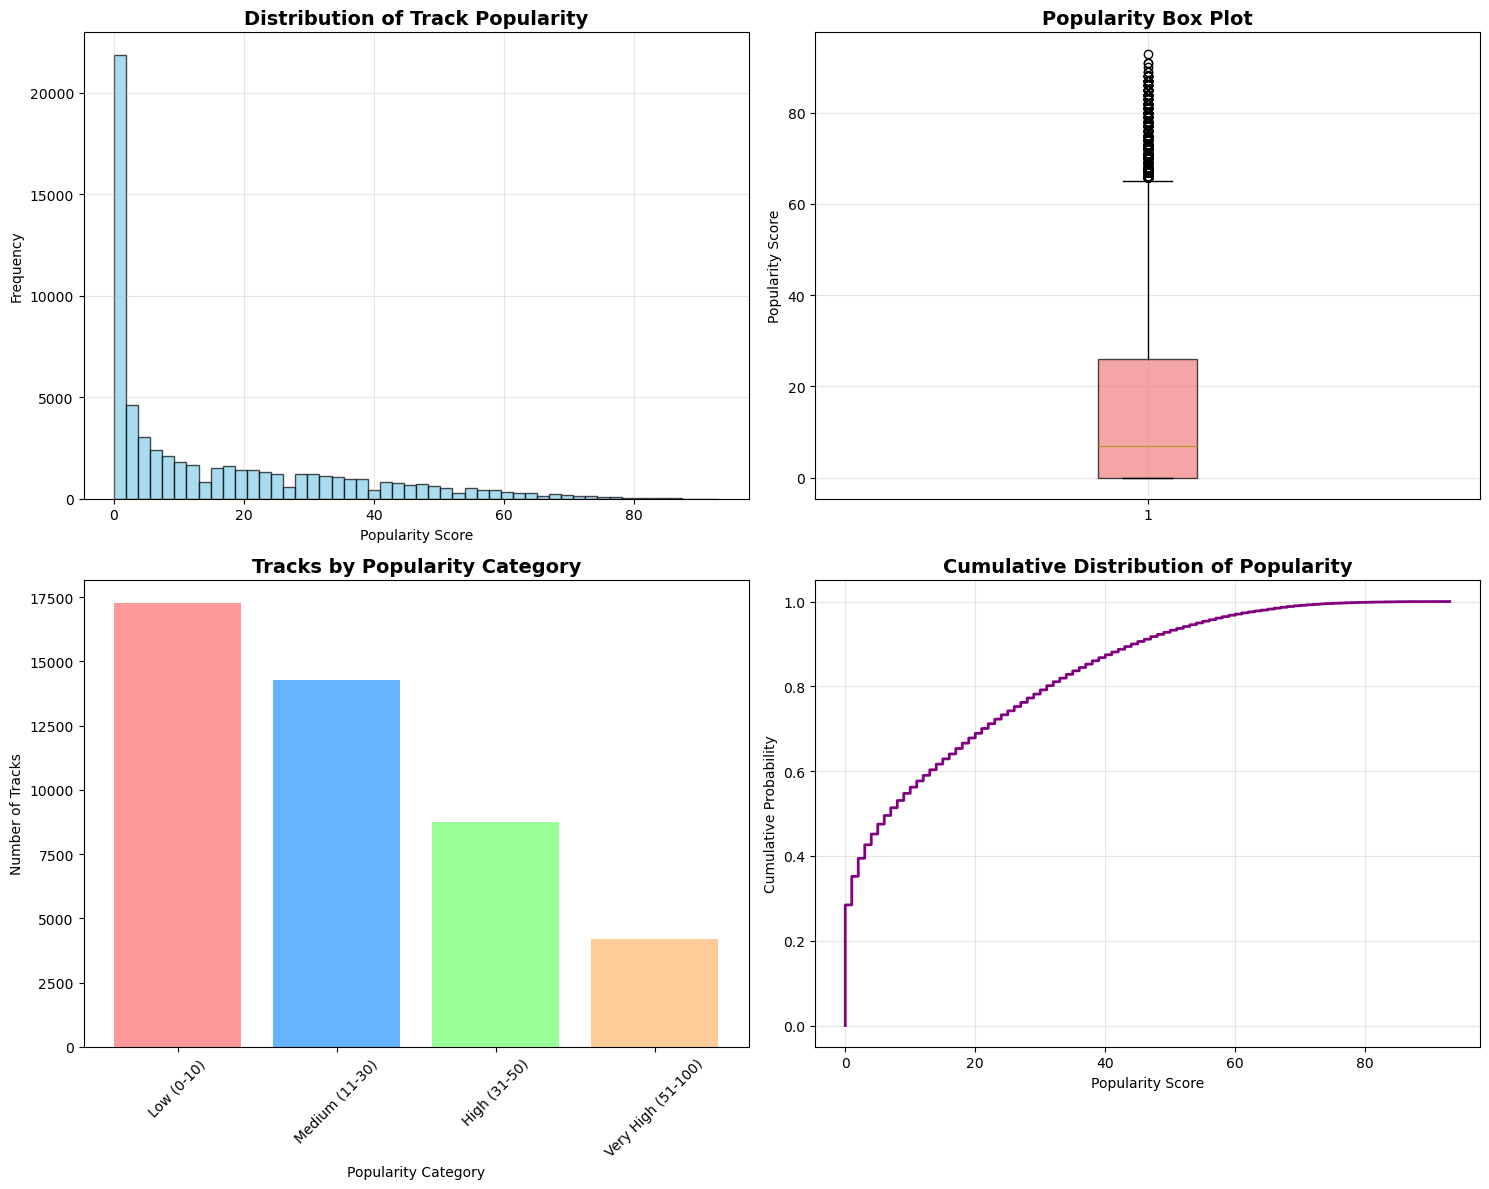

POPULARITY STATISTICS:
Mean: 15.36
Median: 7.00
Mode: 0
Standard Deviation: 18.63
Skewness: 1.23
Kurtosis: 0.66

KEY INSIGHTS:
 17,698 tracks (28.4%) have 0 popularity
 4,211 tracks (6.8%) are highly popular (>50)
 111 tracks (0.2%) are extremely popular (>80)


In [28]:
# Popularity distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0,0].hist(df_clean['popularity'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Track Popularity', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Popularity Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Box plot
axes[0,1].boxplot(df_clean['popularity'], patch_artist=True, 
                  boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[0,1].set_title('Popularity Box Plot', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Popularity Score')
axes[0,1].grid(True, alpha=0.3)

# Popularity categories
popularity_counts = df_clean['popularity_category'].value_counts()
axes[1,0].bar(popularity_counts.index, popularity_counts.values, 
              color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1,0].set_title('Tracks by Popularity Category', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Popularity Category')
axes[1,0].set_ylabel('Number of Tracks')
axes[1,0].tick_params(axis='x', rotation=45)

# Cumulative distribution
sorted_popularity = np.sort(df_clean['popularity'])
y = np.arange(1, len(sorted_popularity) + 1) / len(sorted_popularity)
axes[1,1].plot(sorted_popularity, y, linewidth=2, color='purple')
axes[1,1].set_title('Cumulative Distribution of Popularity', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Popularity Score')
axes[1,1].set_ylabel('Cumulative Probability')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("POPULARITY STATISTICS:")
print(f"Mean: {df_clean['popularity'].mean():.2f}")
print(f"Median: {df_clean['popularity'].median():.2f}")
print(f"Mode: {df_clean['popularity'].mode().iloc[0]}")
print(f"Standard Deviation: {df_clean['popularity'].std():.2f}")
print(f"Skewness: {df_clean['popularity'].skew():.2f}")
print(f"Kurtosis: {df_clean['popularity'].kurtosis():.2f}")

print(f"\nKEY INSIGHTS:")
print(f" {(df_clean['popularity'] == 0).sum():,} tracks ({(df_clean['popularity'] == 0).sum()/len(df_clean)*100:.1f}%) have 0 popularity")
print(f" {(df_clean['popularity'] > 50).sum():,} tracks ({(df_clean['popularity'] > 50).sum()/len(df_clean)*100:.1f}%) are highly popular (>50)")
print(f" {(df_clean['popularity'] > 80).sum():,} tracks ({(df_clean['popularity'] > 80).sum()/len(df_clean)*100:.1f}%) are extremely popular (>80)")

### Distribution of Audio Features

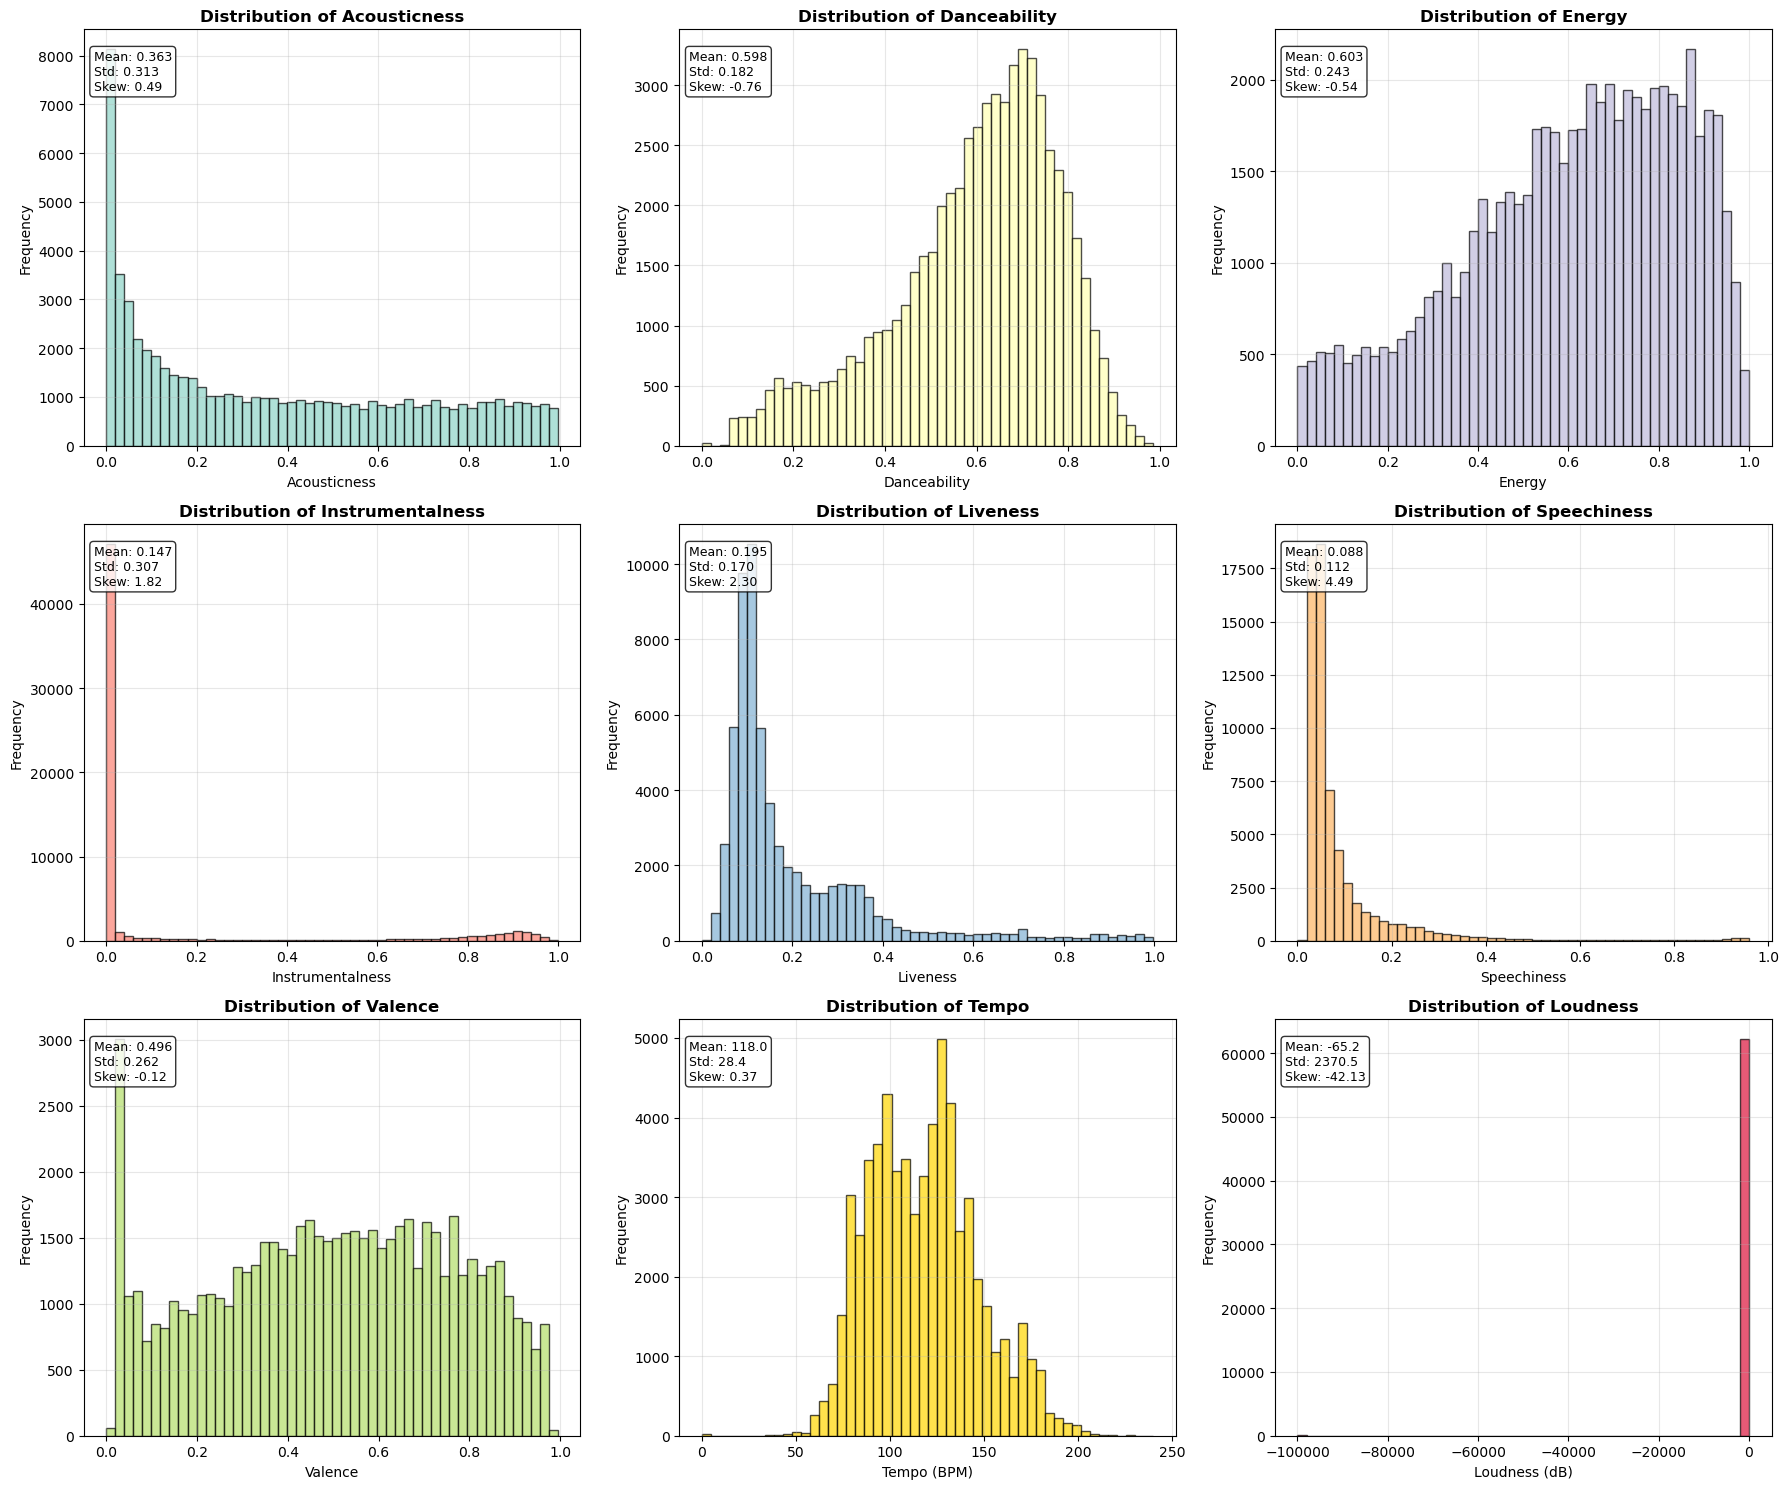

In [29]:
# Audio features distribution
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'speechiness', 'valence']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, feature in enumerate(audio_features):
    # Remove NaN values for plotting
    data = df_clean[feature].dropna()
    
    axes[i].hist(data, bins=50, edgecolor='black', alpha=0.7, color=plt.cm.Set3(i))
    axes[i].set_title(f'Distribution of {feature.title()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature.title())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f'Mean: {data.mean():.3f}\nStd: {data.std():.3f}\nSkew: {data.skew():.2f}'
    axes[i].text(0.02, 0.95, stats_text, transform=axes[i].transAxes, fontsize=9,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Tempo and Loudness (different scales)
tempo_data = df_clean['tempo'].dropna()
axes[7].hist(tempo_data, bins=50, edgecolor='black', alpha=0.7, color='gold')
axes[7].set_title('Distribution of Tempo', fontsize=12, fontweight='bold')
axes[7].set_xlabel('Tempo (BPM)')
axes[7].set_ylabel('Frequency')
axes[7].grid(True, alpha=0.3)
stats_text = f'Mean: {tempo_data.mean():.1f}\nStd: {tempo_data.std():.1f}\nSkew: {tempo_data.skew():.2f}'
axes[7].text(0.02, 0.95, stats_text, transform=axes[7].transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

loudness_data = df_clean['loudness']
axes[8].hist(loudness_data, bins=50, edgecolor='black', alpha=0.7, color='crimson')
axes[8].set_title('Distribution of Loudness', fontsize=12, fontweight='bold')
axes[8].set_xlabel('Loudness (dB)')
axes[8].set_ylabel('Frequency')
axes[8].grid(True, alpha=0.3)
stats_text = f'Mean: {loudness_data.mean():.1f}\nStd: {loudness_data.std():.1f}\nSkew: {loudness_data.skew():.2f}'
axes[8].text(0.02, 0.95, stats_text, transform=axes[8].transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### Categorical Features Analysis

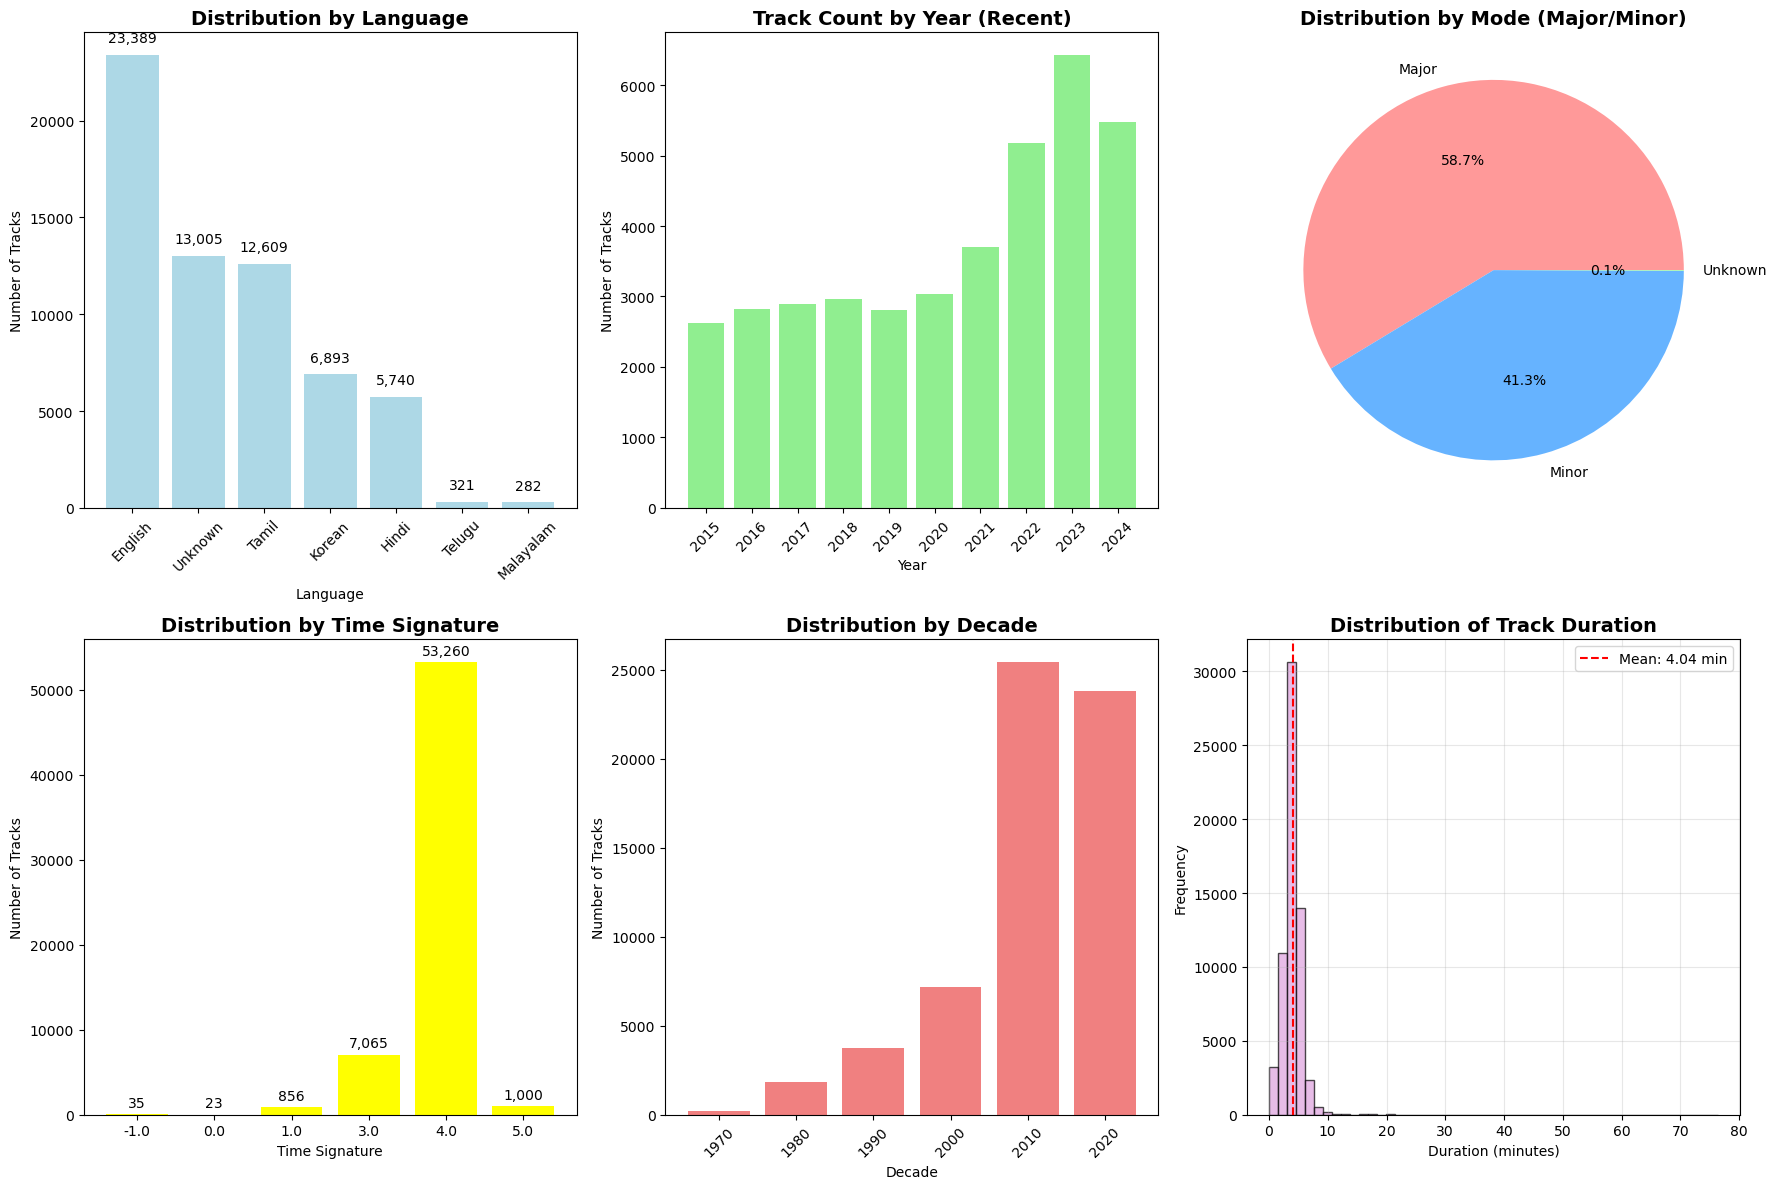

CATEGORICAL FEATURES SUMMARY:
 Most common language: English (23,389 tracks)
 Most common mode: Major (36,511 tracks)
 Most common time signature: -1.0 (35 tracks)
 Average track duration: 4.04 minutes
 Most productive decade: 2020s (23,812 tracks)


In [30]:
# Categorical features analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Language distribution
language_counts = df_clean['language'].value_counts()
axes[0,0].bar(language_counts.index, language_counts.values, color='lightblue')
axes[0,0].set_title('Distribution by Language', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Language')
axes[0,0].set_ylabel('Number of Tracks')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(language_counts.values):
    axes[0,0].text(i, v + 500, f'{v:,}', ha='center', va='bottom')

# Year distribution 
year_counts = df_clean['year'].value_counts().sort_index()
recent_years = year_counts.tail(10)  # Show last 10 years
axes[0,1].bar(recent_years.index.astype(str), recent_years.values, color='lightgreen')
axes[0,1].set_title('Track Count by Year (Recent)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Tracks')
axes[0,1].tick_params(axis='x', rotation=45)

# Mode distribution
mode_counts = df_clean['mode_name'].value_counts()
axes[0,2].pie(mode_counts.values, labels=mode_counts.index, autopct='%1.1f%%', 
              colors=['#ff9999', '#66b3ff', '#99ff99'])
axes[0,2].set_title('Distribution by Mode (Major/Minor)', fontsize=14, fontweight='bold')

# Time signature distribution
time_sig_counts = df_clean['time_signature'].value_counts().sort_index()
axes[1,0].bar(time_sig_counts.index.astype(str), time_sig_counts.values, color='yellow')
axes[1,0].set_title('Distribution by Time Signature', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Time Signature')
axes[1,0].set_ylabel('Number of Tracks')
for i, v in enumerate(time_sig_counts.values):
    axes[1,0].text(i, v + 500, f'{v:,}', ha='center', va='bottom')

# Year distribution (by decade)
decade_counts = df_clean['year_decade'].value_counts().sort_index()
axes[1,1].bar(decade_counts.index.astype(str), decade_counts.values, color='lightcoral')
axes[1,1].set_title('Distribution by Decade', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Decade')
axes[1,1].set_ylabel('Number of Tracks')
axes[1,1].tick_params(axis='x', rotation=45)

# Duration distribution
axes[1,2].hist(df_clean['duration_min'], bins=50, edgecolor='black', alpha=0.7, color='plum')
axes[1,2].set_title('Distribution of Track Duration', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Duration (minutes)')
axes[1,2].set_ylabel('Frequency')
axes[1,2].axvline(df_clean['duration_min'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df_clean["duration_min"].mean():.2f} min')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("CATEGORICAL FEATURES SUMMARY:")
print(f" Most common language: {language_counts.index[0]} ({language_counts.iloc[0]:,} tracks)")
print(f" Most common mode: {mode_counts.index[0]} ({mode_counts.iloc[0]:,} tracks)")
print(f" Most common time signature: {time_sig_counts.index[0]} ({time_sig_counts.iloc[0]:,} tracks)")
print(f" Average track duration: {df_clean['duration_min'].mean():.2f} minutes")
print(f" Most productive decade: {decade_counts.index[-1]}s ({decade_counts.iloc[-1]:,} tracks)")

## 5. Bivariate Analysis

Now let's explore relationships between different features, particularly focusing on what factors influence track popularity.

### Audio Features vs Popularity

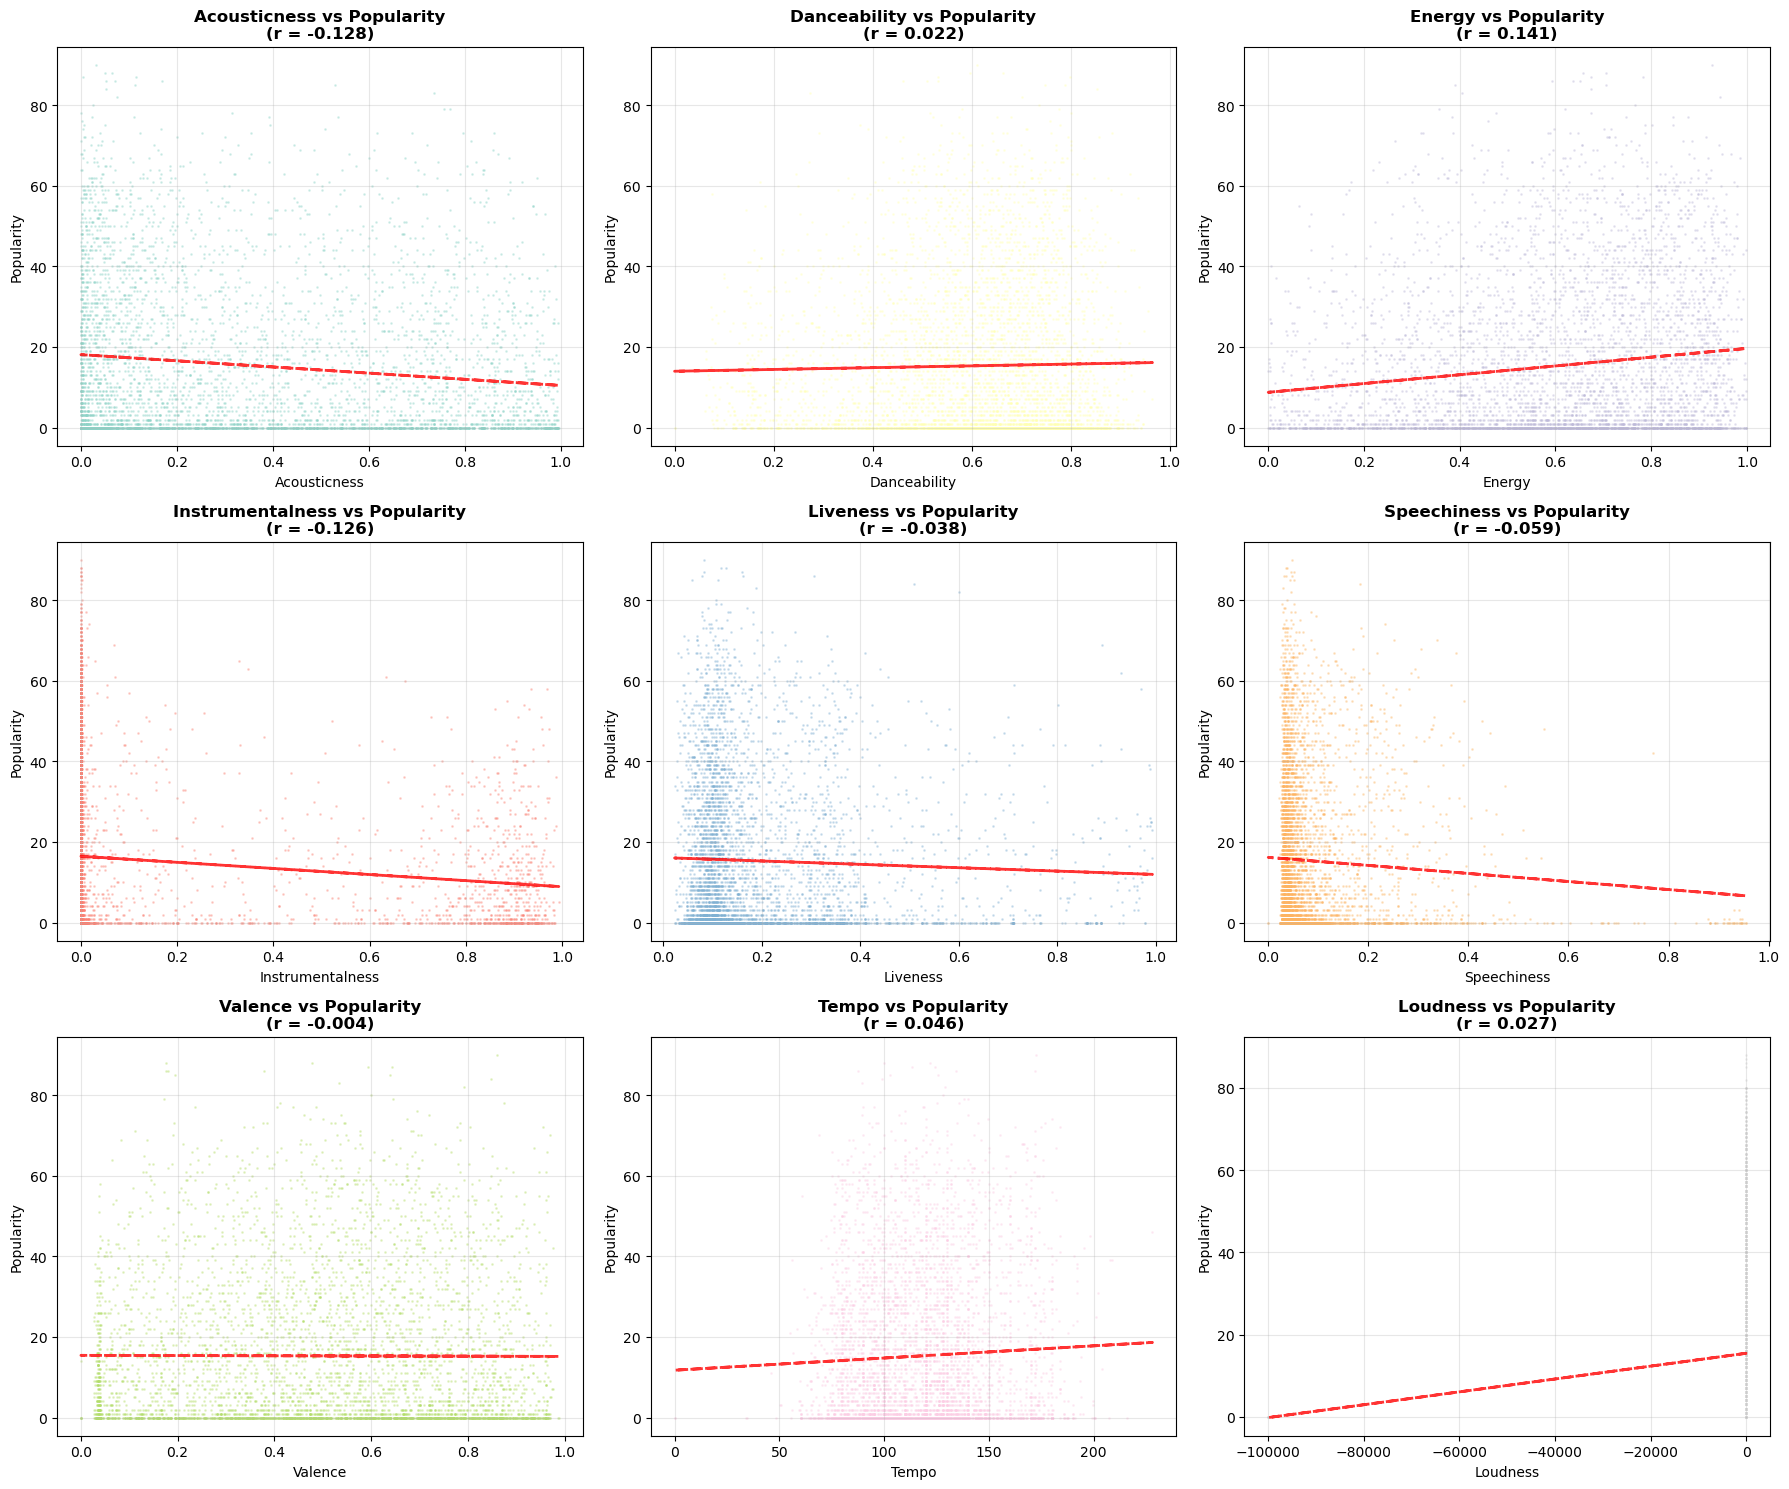

In [31]:
# Audio features vs Popularity scatter plots
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'speechiness', 'valence', 'tempo', 'loudness']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

correlations = []

for i, feature in enumerate(audio_features):
    # Create scatter plot (sample for performance)
    sample_data = df_clean[[feature, 'popularity']].dropna().sample(n=min(5000, len(df_clean)), random_state=42)
    
    axes[i].scatter(sample_data[feature], sample_data['popularity'], 
                   alpha=0.3, s=1, color=plt.cm.Set3(i))
    
    # Calculate correlation
    corr = sample_data[feature].corr(sample_data['popularity'])
    correlations.append((feature, corr))
    
    # Add trend line
    z = np.polyfit(sample_data[feature], sample_data['popularity'], 1)
    p = np.poly1d(z)
    axes[i].plot(sample_data[feature], p(sample_data[feature]), "r--", alpha=0.8, linewidth=2)
    
    axes[i].set_xlabel(feature.title())
    axes[i].set_ylabel('Popularity')
    axes[i].set_title(f'{feature.title()} vs Popularity\n(r = {corr:.3f})', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Popularity by Categorical Features

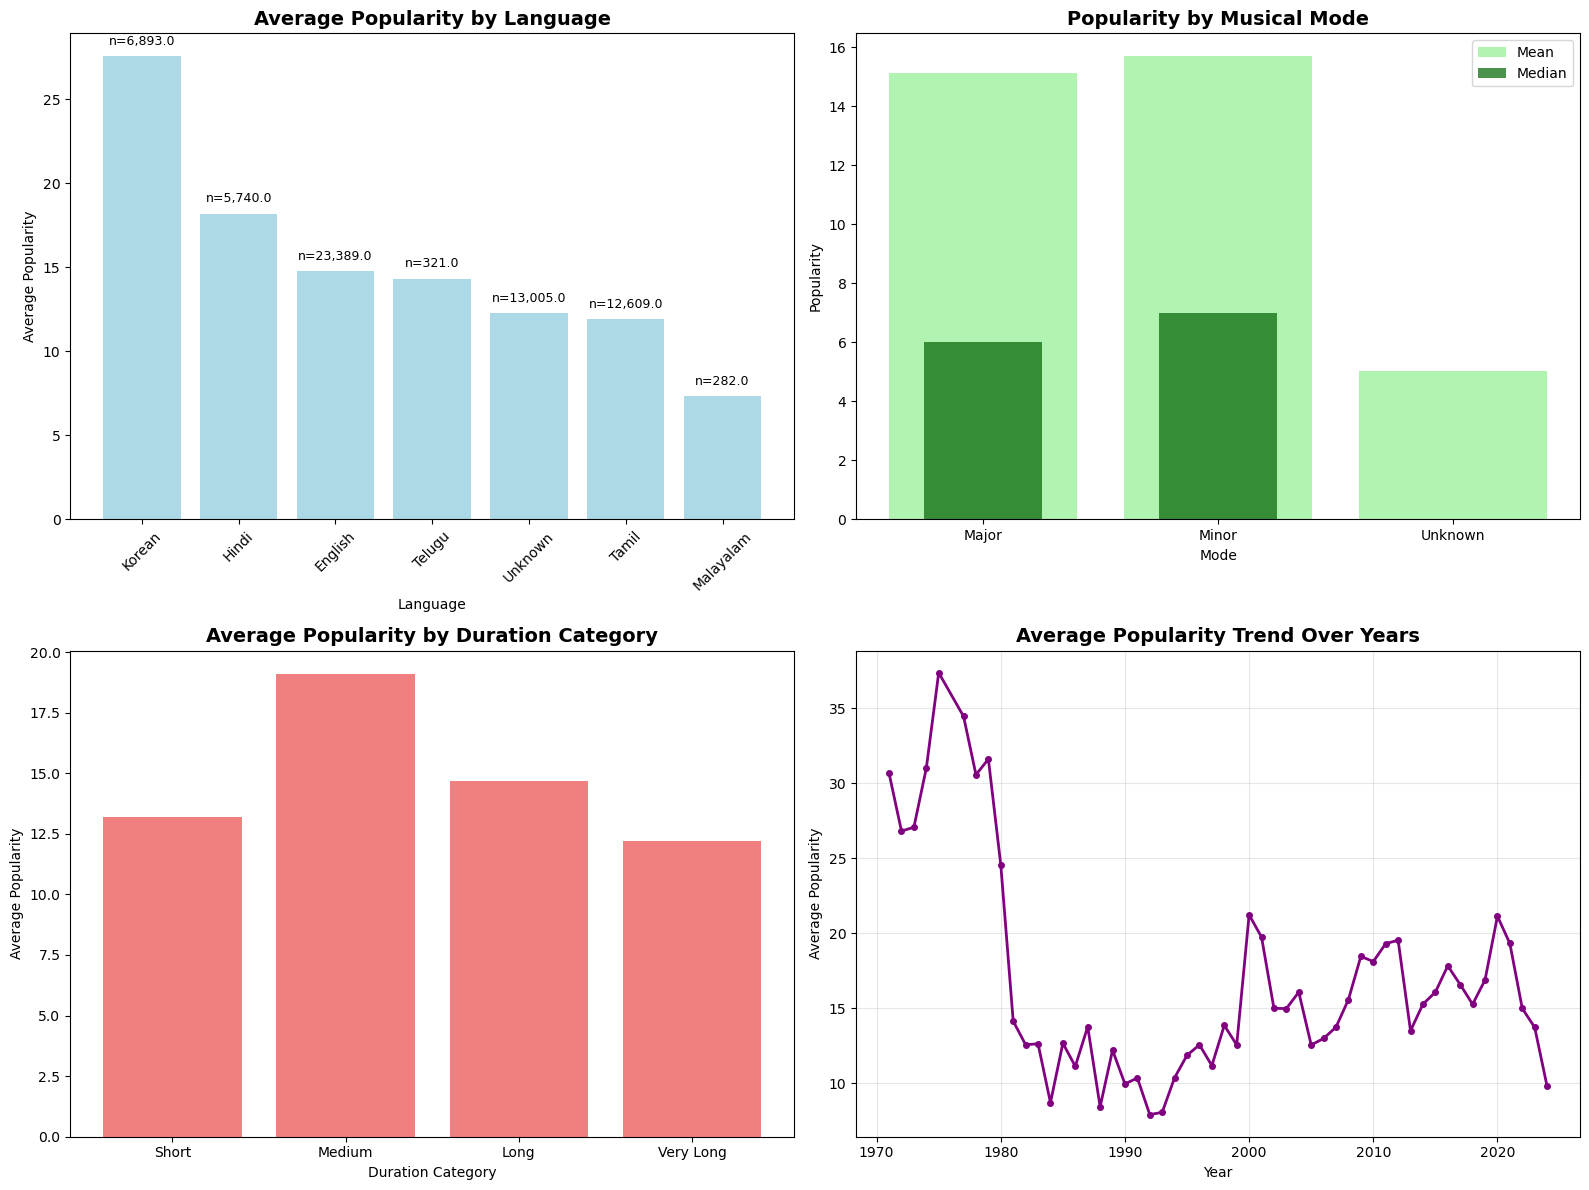

POPULARITY BY CATEGORIES:

By Language (with ≥100 tracks):
 Korean: 27.5 avg popularity (6,893.0 tracks)
 Hindi: 18.2 avg popularity (5,740.0 tracks)
 English: 14.8 avg popularity (23,389.0 tracks)
 Telugu: 14.3 avg popularity (321.0 tracks)
 Unknown: 12.3 avg popularity (13,005.0 tracks)

By Mode:
 Major: 15.1 avg popularity (36,511.0 tracks)
 Minor: 15.7 avg popularity (25,693.0 tracks)
 Unknown: 5.0 avg popularity (35.0 tracks)

By Duration Category:
 Short: 13.2 avg popularity
 Medium: 19.1 avg popularity
 Long: 14.7 avg popularity
 Very Long: 12.2 avg popularity


In [32]:
# Popularity by categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Popularity by Language
language_pop = df_clean.groupby('language')['popularity'].agg(['mean', 'count']).sort_values('mean', ascending=False)
language_pop = language_pop[language_pop['count'] >= 100]  # Filter languages with at least 100 tracks

axes[0,0].bar(language_pop.index, language_pop['mean'], color='lightblue')
axes[0,0].set_title('Average Popularity by Language', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Language')
axes[0,0].set_ylabel('Average Popularity')
axes[0,0].tick_params(axis='x', rotation=45)

# Add count annotations
for i, (idx, row) in enumerate(language_pop.iterrows()):
    axes[0,0].text(i, row['mean'] + 0.5, f"n={row['count']:,}", ha='center', va='bottom', fontsize=9)

# Popularity by Mode
mode_pop = df_clean.groupby('mode_name')['popularity'].agg(['mean', 'median', 'count'])
axes[0,1].bar(mode_pop.index, mode_pop['mean'], color='lightgreen', alpha=0.7, label='Mean')
axes[0,1].bar(mode_pop.index, mode_pop['median'], color='darkgreen', alpha=0.7, width=0.5, label='Median')
axes[0,1].set_title('Popularity by Musical Mode', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Mode')
axes[0,1].set_ylabel('Popularity')
axes[0,1].legend()

# Popularity by Duration Category
duration_cat = pd.cut(df_clean['duration_min'], bins=[0, 3, 4, 5, 20], labels=['Short', 'Medium', 'Long', 'Very Long'])
duration_pop = df_clean.groupby(duration_cat)['popularity'].mean()
axes[1,0].bar(duration_pop.index, duration_pop.values, color='lightcoral')
axes[1,0].set_title('Average Popularity by Duration Category', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Duration Category')
axes[1,0].set_ylabel('Average Popularity')

# Popularity over time (by year)
yearly_pop = df_clean.groupby('year')['popularity'].agg(['mean', 'count'])
yearly_pop = yearly_pop[yearly_pop['count'] >= 10]  # Filter years with at least 10 tracks

axes[1,1].plot(yearly_pop.index, yearly_pop['mean'], marker='o', linewidth=2, markersize=4, color='purple')
axes[1,1].set_title('Average Popularity Trend Over Years', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Average Popularity')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("POPULARITY BY CATEGORIES:")
print(f"\nBy Language (with ≥100 tracks):")
for lang, row in language_pop.head(5).iterrows():
    print(f" {lang}: {row['mean']:.1f} avg popularity ({row['count']:,} tracks)")

print(f"\nBy Mode:")
for mode, row in mode_pop.iterrows():
    print(f" {mode}: {row['mean']:.1f} avg popularity ({row['count']:,} tracks)")

print(f"\nBy Duration Category:")
for dur, pop in duration_pop.items():
    print(f" {dur}: {pop:.1f} avg popularity")

## 6. Multivariate Analysis

Let's explore the relationships between multiple features simultaneously to uncover complex patterns.

### Correlation Matrix of Audio Features

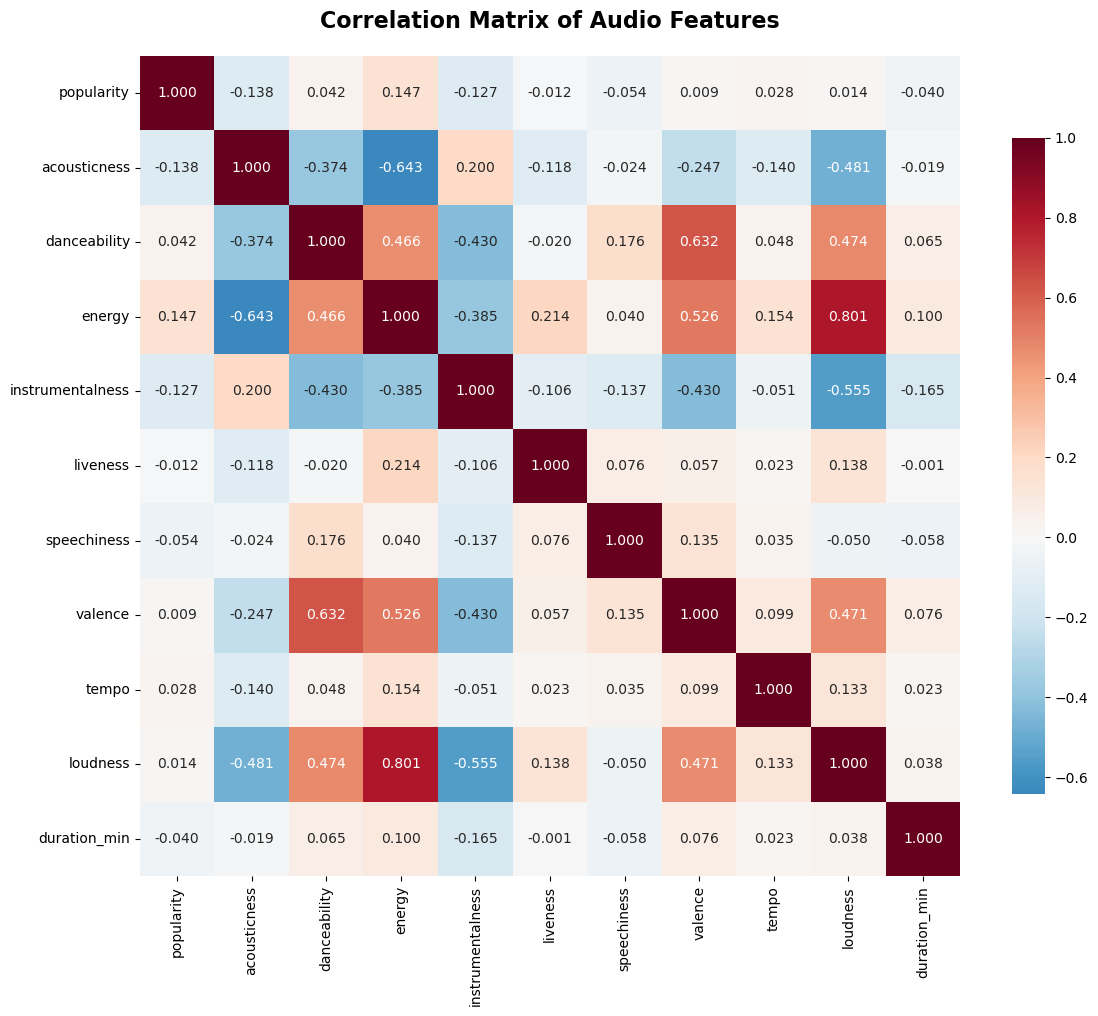

In [33]:
# Correlation matrix of audio features
audio_features_for_corr = ['popularity', 'acousticness', 'danceability', 'energy', 
                          'instrumentalness', 'liveness', 'speechiness', 'valence', 
                          'tempo', 'loudness', 'duration_min']

# Calculate correlation matrix
corr_matrix = df_clean[audio_features_for_corr].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Audio Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Time Series Analysis

Let's analyze how music characteristics and popularity have evolved over the years.

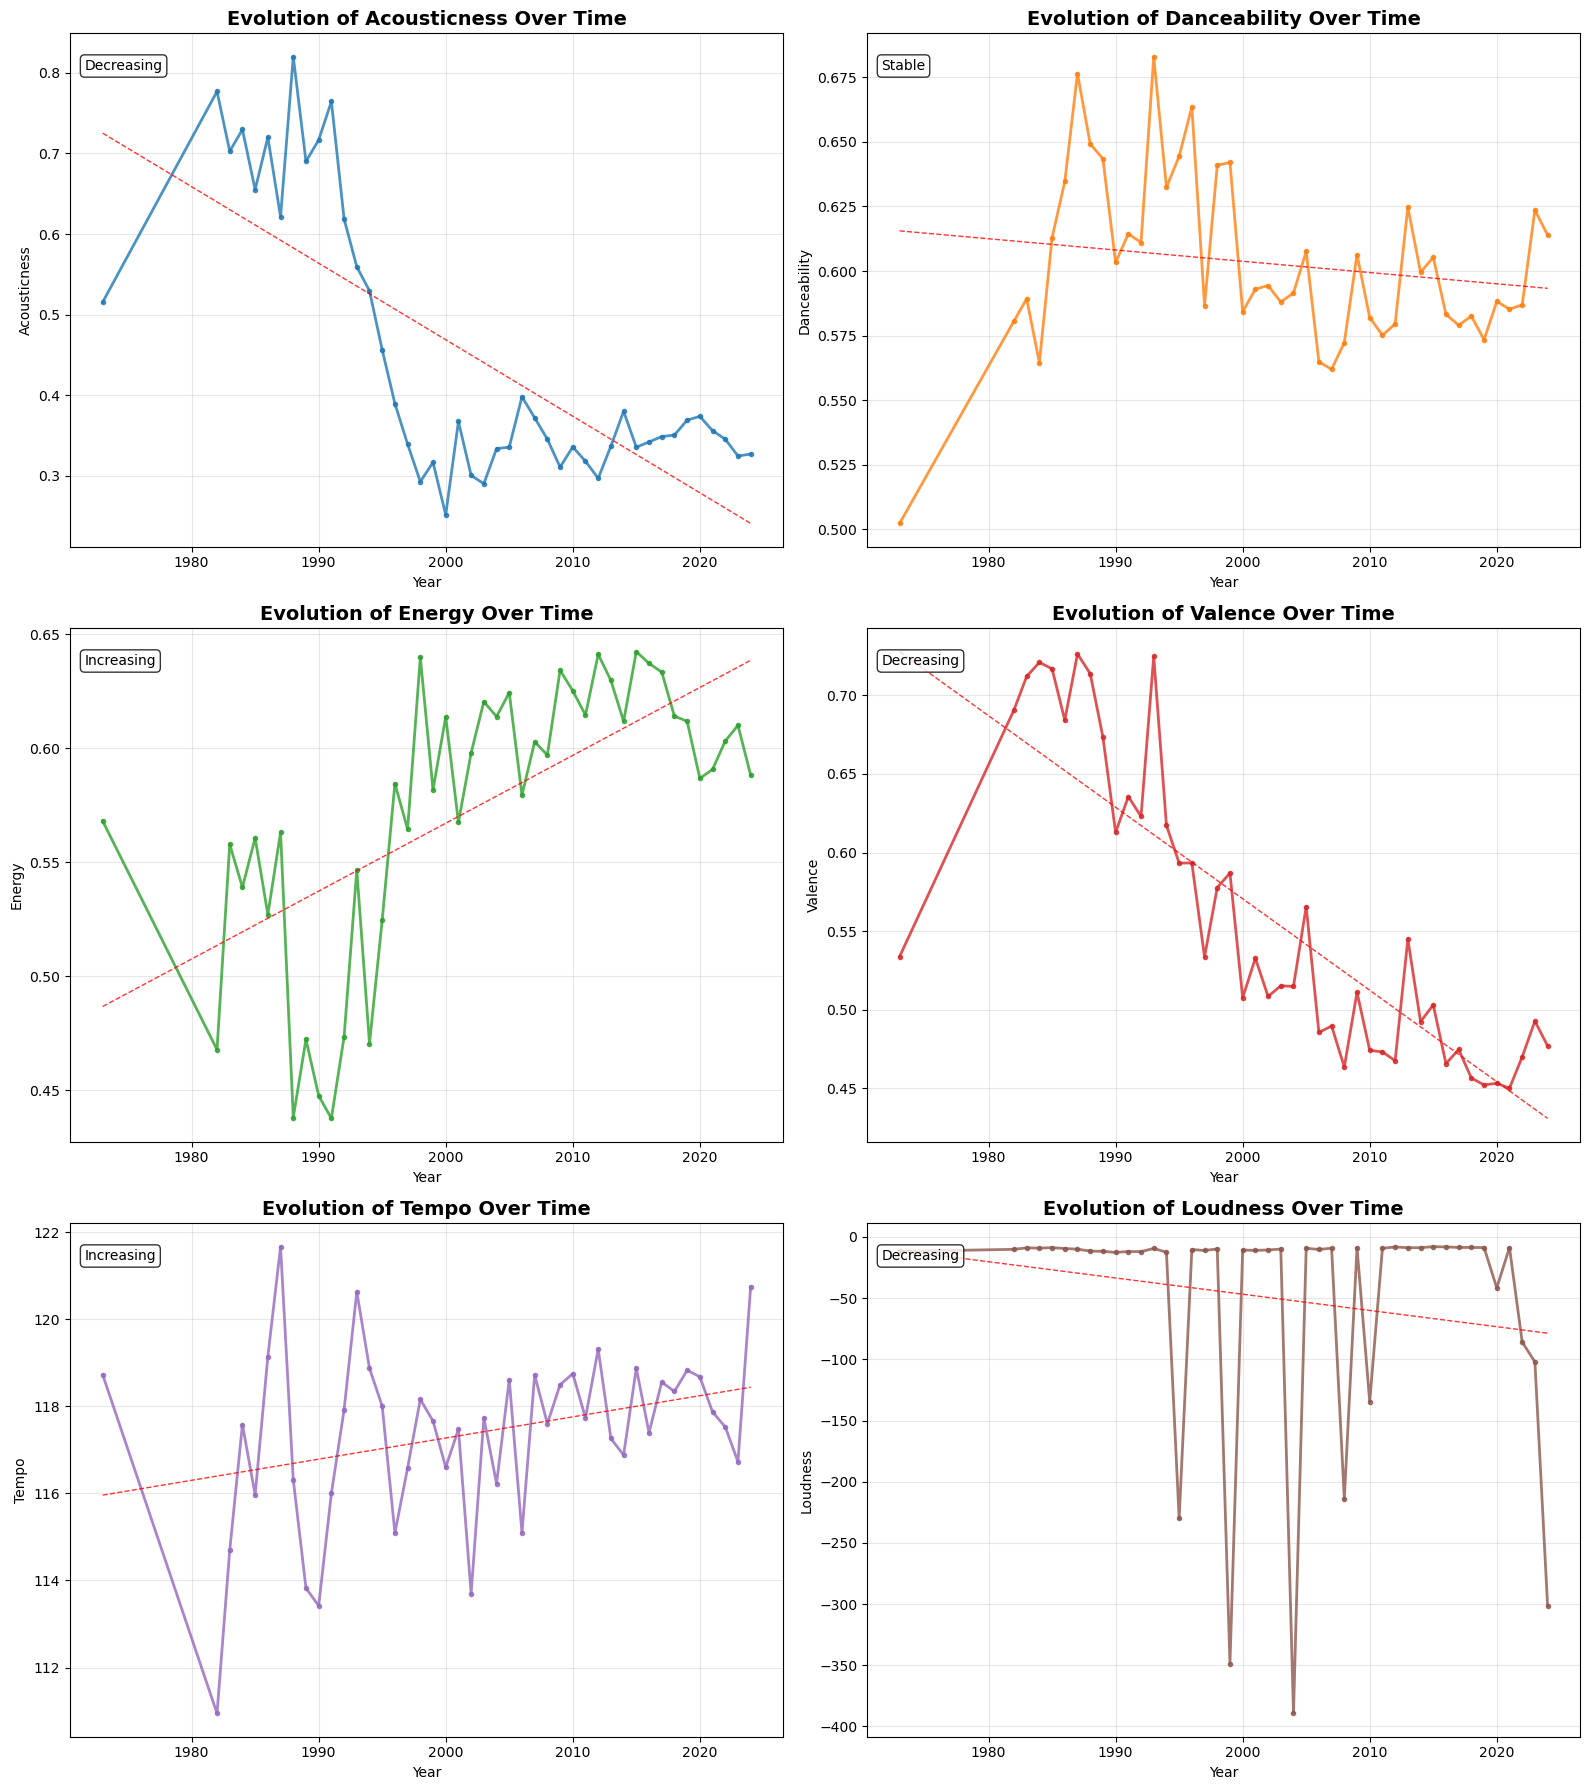

In [34]:
# Evolution of audio features over time
audio_features_trend = ['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'loudness']

# Group by year and calculate mean for each feature
yearly_trends = df_clean.groupby('year')[audio_features_trend + ['popularity']].mean()

# Filter years with sufficient data (at least 50 tracks)
year_counts = df_clean['year'].value_counts()
sufficient_years = year_counts[year_counts >= 50].index
yearly_trends_filtered = yearly_trends.loc[sufficient_years].sort_index()

# Create subplots for trends
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, feature in enumerate(audio_features_trend):
    axes[i].plot(yearly_trends_filtered.index, yearly_trends_filtered[feature], 
                 marker='o', linewidth=2, markersize=3, color=colors[i], alpha=0.8)
    axes[i].set_title(f'Evolution of {feature.title()} Over Time', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(feature.title())
    axes[i].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(yearly_trends_filtered.index, yearly_trends_filtered[feature], 1)
    p = np.poly1d(z)
    axes[i].plot(yearly_trends_filtered.index, p(yearly_trends_filtered.index), 
                 "r--", alpha=0.8, linewidth=1)
    
    # Calculate trend direction
    slope = z[0]
    trend = "Increasing" if slope > 0.001 else "Decreasing" if slope < -0.001 else "Stable"
    axes[i].text(0.02, 0.95, trend, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


### Basic Conclusions

From looking at the data, I found some patterns:

- Most tracks have low popularity scores (mean is around 15)
- Korean songs seem to be more popular on average 
- English songs are the most common but not necessarily the most popular
- Songs around 3-4 minutes tend to perform better
- There are some correlations between audio features and popularity but they're not very strong

